In [1]:
# importing all necessary modules

from nltk.tokenize import sent_tokenize, word_tokenize
import warnings
import nltk

In [2]:
warnings.filterwarnings(action = 'ignore')

In [4]:
import gensim
from gensim.models import Word2Vec

In [5]:
# Read 'alice.txt' file

sample = open("alice30.txt", "r")
s = sample.read()

In [6]:
# Replaces escape character with space

f = s.replace("\n", " ")

In [7]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/aiml/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [8]:
data = []

# iterate through each sentence in the file 

for i in sent_tokenize(f):
    temp = []
    
    # tokenize the sentence into words
    for j in word_tokenize(i):
        temp.append(j.lower())
        
    data.append(temp)
    
# Create CBOW model

model1 = gensim.models.Word2Vec(data, min_count = 1, size = 100, window = 5)

In [9]:
# Print results

print("Cosine similarity between 'alice' " + 
               "and 'wonderland' - CBOW : ", 
    model1.similarity('alice', 'wonderland'))

print("Cosine similarity between 'alice' " +
                 "and 'machines' - CBOW : ", 
      model1.similarity('alice', 'machines')) 


Cosine similarity between 'alice' and 'wonderland' - CBOW :  0.99835956
Cosine similarity between 'alice' and 'machines' - CBOW :  0.9968506


In [10]:
# Create Skip Gram model 
model2 = gensim.models.Word2Vec(data, min_count = 1, size = 100, 
                                             window = 5, sg = 1) 

In [11]:
# Print results 
print("Cosine similarity between 'alice' " +
          "and 'wonderland' - Skip Gram : ", 
    model2.similarity('alice', 'wonderland')) 
      
print("Cosine similarity between 'alice' " +
            "and 'machines' - Skip Gram : ", 
      model2.similarity('alice', 'machines')) 

Cosine similarity between 'alice' and 'wonderland' - Skip Gram :  0.9644017
Cosine similarity between 'alice' and 'machines' - Skip Gram :  0.96387374


In [12]:
words = list(model1.wv.vocab)
print(words[0:10])

['***this', 'is', 'the', 'project', 'gutenberg', 'etext', 'of', 'alice', 'in', 'wonderland***']


In [13]:
print(model1['wonderland***'])

[ 0.01128644 -0.00877068  0.00894149  0.01599641  0.00417557  0.01078845
  0.00292581  0.01082033 -0.00290741 -0.01240278 -0.03402933  0.02166866
 -0.00273285  0.03552062  0.00290481  0.03901116  0.01960436 -0.01324649
  0.00867468  0.0328383  -0.02627268 -0.00708007  0.01461631  0.02581736
 -0.02274333  0.02036851  0.00568017  0.02011211  0.00458276 -0.01424827
  0.03997151 -0.0001681   0.02908247 -0.00794499 -0.03833116  0.00257312
 -0.03510872 -0.02735229 -0.01760773 -0.00930104 -0.00590898  0.00232389
 -0.01655075  0.02514368  0.00439985  0.00053493 -0.00425637  0.01876623
  0.00308233  0.01303142 -0.00576373 -0.00897631 -0.03081933 -0.06152321
  0.0189015   0.02694067  0.0480433  -0.00958968 -0.00106873  0.01148907
 -0.01099065 -0.02589742 -0.04138185  0.02424099  0.00041846  0.01358657
 -0.0001942  -0.03413978  0.00134137 -0.00527596 -0.0330371  -0.02370033
 -0.04758048  0.01635612  0.02383675  0.01453483 -0.04598214 -0.03194192
 -0.07462158 -0.00416885 -0.03892785 -0.00647475 -0

In [14]:
words = list(model2.wv.vocab)
print(words[0:10])

['***this', 'is', 'the', 'project', 'gutenberg', 'etext', 'of', 'alice', 'in', 'wonderland***']


In [15]:
print(model2['wonderland***'])

[-0.03713097 -0.01515858  0.06339652  0.03348429  0.02840157 -0.01777805
  0.01182371  0.01944545  0.0158375   0.00595592 -0.00322205 -0.00754357
 -0.04144897  0.06933254 -0.04903701  0.04204399  0.04620302 -0.03883412
  0.01745522  0.07669427 -0.04593705  0.01397815 -0.01621577  0.03486569
  0.01243882  0.04343924  0.06055322 -0.02184524  0.01243095 -0.00806258
  0.03749198  0.00823908  0.10948005 -0.02294799 -0.03770848 -0.00302766
 -0.0277998  -0.03357831 -0.00057364 -0.01859639  0.0592222  -0.0227549
 -0.07600749  0.05573327 -0.00037383 -0.03433049  0.01434411  0.04782663
  0.04225618  0.03900487 -0.02583448 -0.03100004 -0.09245322 -0.12738088
  0.06272928  0.02357974  0.10483426 -0.03084532  0.02123027  0.01268531
  0.01433342 -0.03862828 -0.06077064  0.07291566  0.02756666 -0.01001928
  0.02934572 -0.04072034  0.01816074 -0.02336274 -0.04530559 -0.04384107
 -0.07864249 -0.02529206  0.05195512  0.03475035 -0.07660683 -0.05963974
 -0.10910057  0.02036843 -0.05077624  0.00197678  0.

In [16]:
model1.save('model1.bin')

In [17]:
model2.wv.save_word2vec_format('model2.txt', binary=False)

In [18]:
model = Word2Vec.load('model1.bin')
                      
                      

In [19]:
# define training data
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
['this', 'is', 'the', 'second', 'sentence'],
['yet', 'another', 'sentence'],
['one', 'more', 'sentence'],
['and', 'the', 'final', 'sentence']]
# train model
model = Word2Vec(sentences, min_count=1)
# summarize the loaded model
print(model)
# summarize vocabulary
words = list(model.wv.vocab)
print(words)
# access vector for one word
print(model['sentence'])
# save model
model.save('model.bin')
# load model
new_model = Word2Vec.load('model.bin')
print(new_model)

Word2Vec(vocab=14, size=100, alpha=0.025)
['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec', 'second', 'yet', 'another', 'one', 'more', 'and', 'final']
[-1.3512813e-03  1.6975999e-03 -3.0944578e-03  2.2344526e-03
  7.6717336e-04 -3.5240483e-03  3.9929869e-03  3.3501037e-03
 -2.0174992e-03 -2.5362170e-03  6.2387326e-04 -9.0164738e-04
 -1.1517925e-03 -1.3770793e-03 -2.2912577e-04  3.6387688e-03
  1.2440794e-03 -3.1890671e-03  4.8211771e-03 -2.2304126e-03
 -1.0045315e-03  4.1174740e-03 -3.5690120e-04 -1.1414136e-03
 -5.4054317e-04 -4.7671497e-03  6.4285158e-04  4.5075109e-03
  3.3779552e-03 -8.4748515e-04  5.9666787e-04  2.3183702e-03
  3.8975121e-03 -3.3721467e-03  2.6117326e-03 -7.6698384e-04
 -2.8339149e-03  5.5891013e-04  1.0870930e-04 -6.9589284e-04
  1.8539509e-03  3.6208865e-03 -2.7089526e-03 -3.7576284e-03
  1.0007750e-03  4.9659824e-03 -4.8702485e-03  3.0877034e-03
 -3.4687093e-03 -4.6347850e-03  2.5720639e-05 -2.1981576e-03
  1.9740493e-03 -4.4956165e-03 -4.7492958e-0

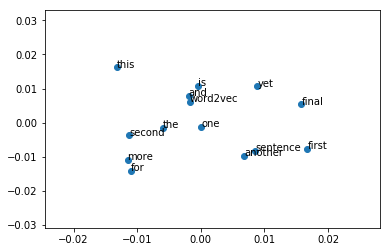

In [20]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot
%matplotlib inline
# define training data
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
['this', 'is', 'the', 'second', 'sentence'],
['yet', 'another', 'sentence'],
['one', 'more', 'sentence'],
['and', 'the', 'final', 'sentence']]
# train model
model = Word2Vec(sentences, min_count=1)
# fit a 2d PCA model to the vectors
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

## ref: https://medium.com/ml2vec/using-word2vec-to-analyze-reddit-comments-28945d8cee57

In [21]:
from sklearn.cluster import KMeans
from sklearn.neighbors import KDTree
import pandas as pd
import numpy as np
import os
import re
import logging
import sqlite3
import time
import sys
import multiprocessing
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
from itertools import cycle